MASOURIS ATHANASIOS <br>
03115189 NTUA ECE

<h2> 1<sup>st</sup> Lab Exercise: Study and Analysis of 
Complex Topological Networks</h2>

In this exercise we are going to create and analyze complex topologies. Then we use some of them to simulate social networks. In order to analyze the topologies we are going to use some analysis metrics such as:
- Node degree
- Node strength
- Average path length
- Clustering coefficient
- Node centralities:
  - Degree centrality
  - Closeness centrality
  - Betweenness centrality
- Ego-betweenness centrality

Furthermore, we examine the threshold behavior of the topologies in regard to their connectivity and the evolution of the Watts-Strogatz model in regard to the probability of rewiring. 

<table width="80%">
    <caption>Table $1$: Complex networks and parameters</caption>
    <thead>
    <tr>
        <th>Network type</th>
        <th>Model</th>
        <th>ID</th>
        <th>Parameters</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Grid</td>
            <td style="background-color:#F2F4F7" rowspan="2">Finite</td>
            <td style="background-color:#F2F4F7" rowspan="2">REG</td>
            <td style="background-color:#F2F4F7">Nodes $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Degree $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="2">Random Graph</td>
            <td style="background-color:#FFFFFF" rowspan="2">Erdos-Renyi</td>
            <td style="background-color:#FFFFFF" rowspan="2">RG(ER)</td>
            <td style="background-color:#FFFFFF">Nodes $N$</td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Edges $M$</td>
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Random Graph</td>
            <td style="background-color:#F2F4F7" rowspan="2">Gilbert</td>
            <td style="background-color:#F2F4F7" rowspan="2">RG(G)</td>
            <td style="background-color:#F2F4F7">Nodes $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Edge probability $p$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Random Geometric Graph</td>
            <td style="background-color:#FFFFFF" rowspan="3">Flat</td>
            <td style="background-color:#FFFFFF" rowspan="3">RGG</td>
            <td style="background-color:#FFFFFF" >Area $L\times L$</td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Radius $R$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Nodes $n$</td>  
        </tr>
        <tr>
            <td style="background-color:#F2F4F7" rowspan="2">Scale-free</td>
            <td style="background-color:#F2F4F7" rowspan="2">Barabasi-Albert</td>
            <td style="background-color:#F2F4F7" rowspan="2">SF(BA)</td>
            <td style="background-color:#F2F4F7">Nodes $n$</td>   
        </tr>
        <tr>
            <td style="background-color:#F2F4F7">Degree of the initial grid $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" rowspan="3">Small-world</td>
            <td style="background-color:#FFFFFF" rowspan="3">Watts-Strogatz</td>
            <td style="background-color:#FFFFFF" rowspan="3">SW(WS)</td>
            <td style="background-color:#FFFFFF">Nodes $n$ </td>   
        </tr>
        <tr>
            <td style="background-color:#FFFFFF" >Degree of the initial grid $d$</td>
        </tr>
        <tr>
            <td style="background-color:#FFFFFF">Probability of rewiring $g_p$</td>  
        </tr>
    </tbody>
</table>

In [0]:
n = 190

In [0]:
%matplotlib inline
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [0]:
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = 10 , 10
plt.rcParams['figure.facecolor'] = 'white'

### A) Creation and visualization of the complex networks

REG with node degree $d = 4$

In [0]:
d = 4

REG= nx.watts_strogatz_graph(n, d, 0)

nx.draw_circular(REG,node_size=50)

RG(ER) with number of edges $M = 750$

In [0]:
M = 750

RGER= nx.gnm_random_graph(n, M) 

nx.draw_circular(RGER, node_size=10)

RGG on area $L\times L = 1$ (unit cube) and radius $R=0.25$

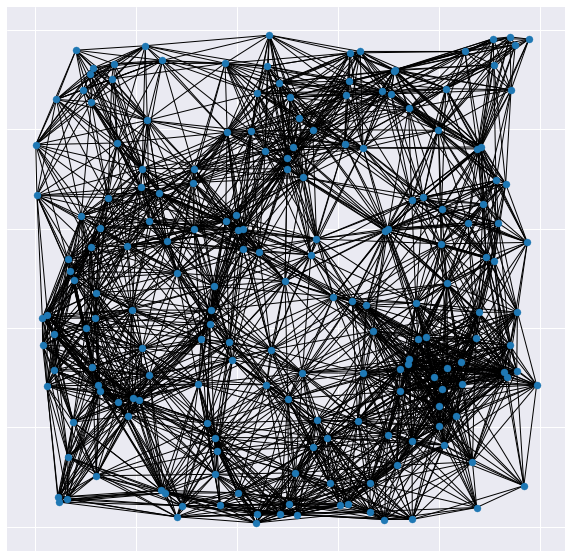

In [0]:
R = 0.25
L = 1

RGG= nx.random_geometric_graph(n, R, 2)

pos= nx.get_node_attributes(RGG,'pos')
nx.draw_networkx_nodes(RGG, pos = pos, node_size=50)
nx.draw_networkx_edges(RGG,pos = pos)


SF with initial node degree $d=4$

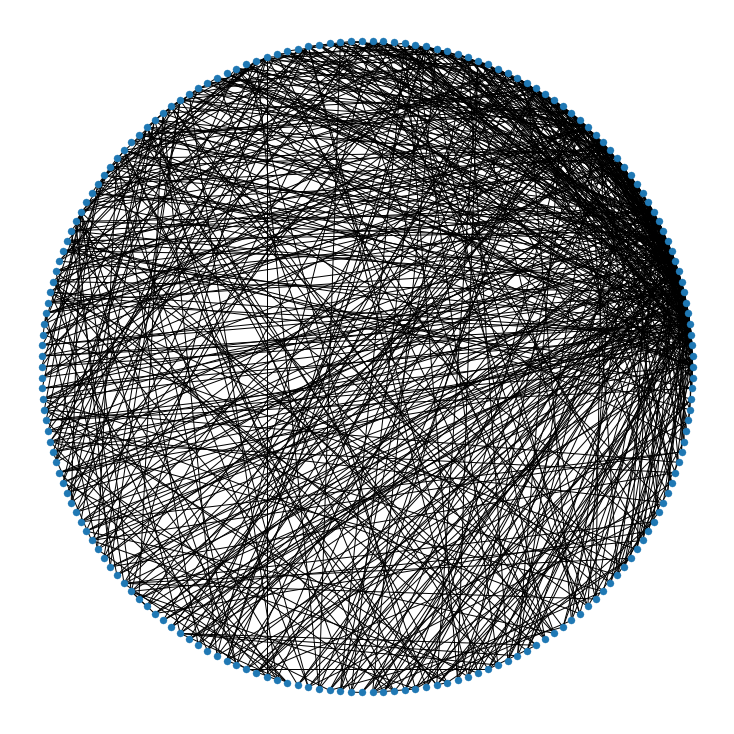

In [0]:
d = 4

SF = nx.barabasi_albert_graph(n,d)

nx.draw_circular(SF, node_size=50)

SW with initial node degree $d=4$ and probability of rewiring $p=0.3$

In [0]:
d = 4
p = 0.3

SW = nx.watts_strogatz_graph(n,d,p)

nx.draw_circular(SW, node_size=50)

### B) Node degree

Study the node degree of the following networks: REG, RG(ER), RGG, SF(BA) and SW(WS)

##### 1)  Calculate node degrees

In [0]:
def find_degree(G):
  return dict(G.degree())

REG_degree= find_degree(REG)
RGER_degree= find_degree(RGER)
RGG_degree= find_degree(RGG)
SF_degree= find_degree(SF)
SW_degree= find_degree(SW)

UNDERLINE = '\033[4m'
END = '\033[0m'

print(UNDERLINE + 'REG network:' + END)
print(REG_degree)

print(UNDERLINE + 'RGER network:' + END)
print(RGER_degree)

print(UNDERLINE + 'RGG network:' + END)
print(RGG_degree)

print(UNDERLINE + 'SF network:' + END)
print(SF_degree)

print(UNDERLINE + 'SW network:' + END)
print(SW_degree)

REG network:
{0: 4, 1: 4, 2: 4, 3: 4, 4: 4, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 4, 19: 4, 20: 4, 21: 4, 22: 4, 23: 4, 24: 4, 25: 4, 26: 4, 27: 4, 28: 4, 29: 4, 30: 4, 31: 4, 32: 4, 33: 4, 34: 4, 35: 4, 36: 4, 37: 4, 38: 4, 39: 4, 40: 4, 41: 4, 42: 4, 43: 4, 44: 4, 45: 4, 46: 4, 47: 4, 48: 4, 49: 4, 50: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 4, 61: 4, 62: 4, 63: 4, 64: 4, 65: 4, 66: 4, 67: 4, 68: 4, 69: 4, 70: 4, 71: 4, 72: 4, 73: 4, 74: 4, 75: 4, 76: 4, 77: 4, 78: 4, 79: 4, 80: 4, 81: 4, 82: 4, 83: 4, 84: 4, 85: 4, 86: 4, 87: 4, 88: 4, 89: 4, 90: 4, 91: 4, 92: 4, 93: 4, 94: 4, 95: 4, 96: 4, 97: 4, 98: 4, 99: 4, 100: 4, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4, 106: 4, 107: 4, 108: 4, 109: 4, 110: 4, 111: 4, 112: 4, 113: 4, 114: 4, 115: 4, 116: 4, 117: 4, 118: 4, 119: 4, 120: 4, 121: 4, 122: 4, 123: 4, 124: 4, 125: 4, 126: 4, 127: 4, 128: 4, 129: 4, 130: 4, 131: 4, 132: 4, 133: 4, 134: 4, 135: 4, 136: 4, 

##### 2)  Plot the node degree distribution and the cumulative degree distribution


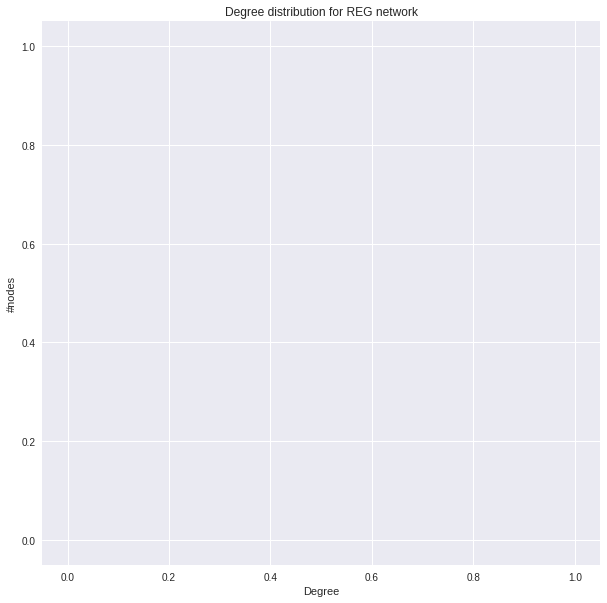

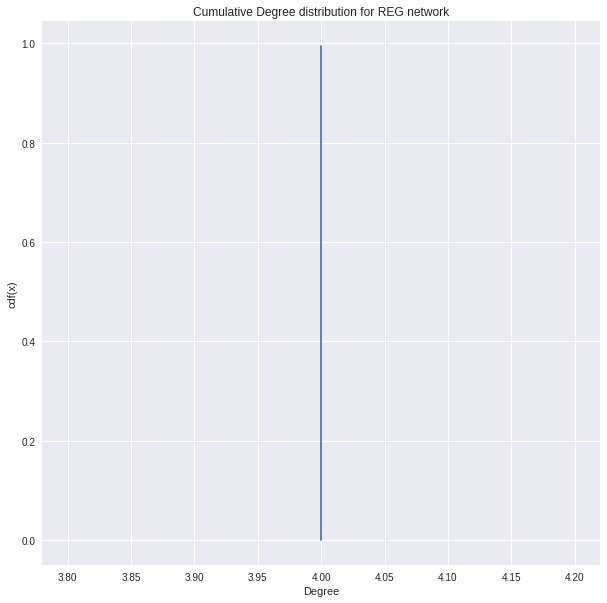

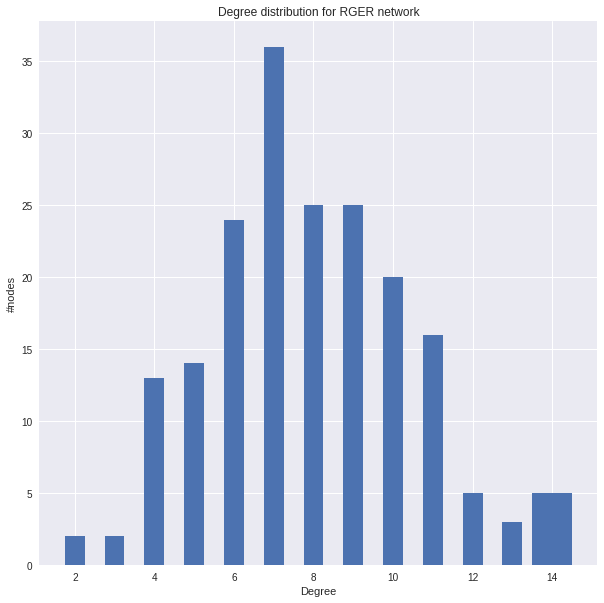

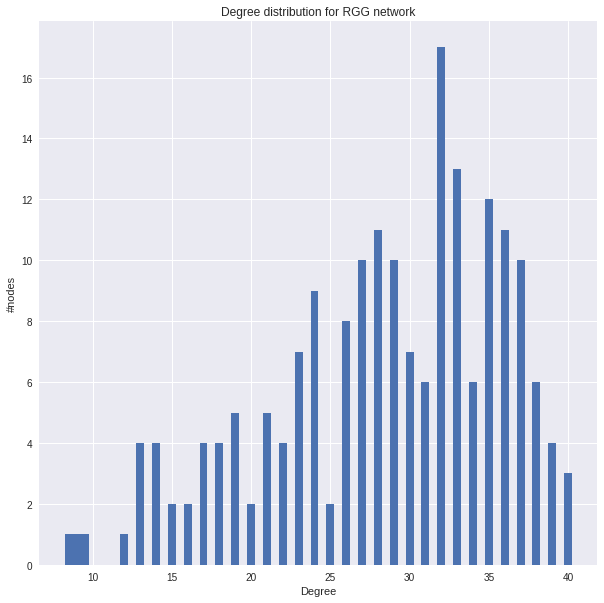

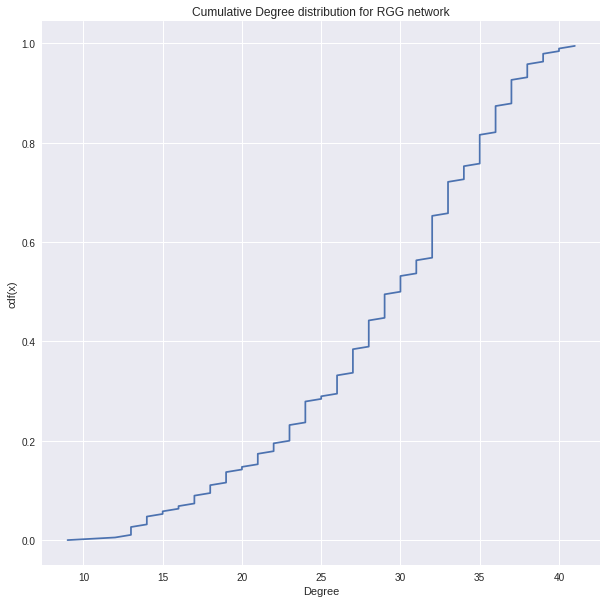

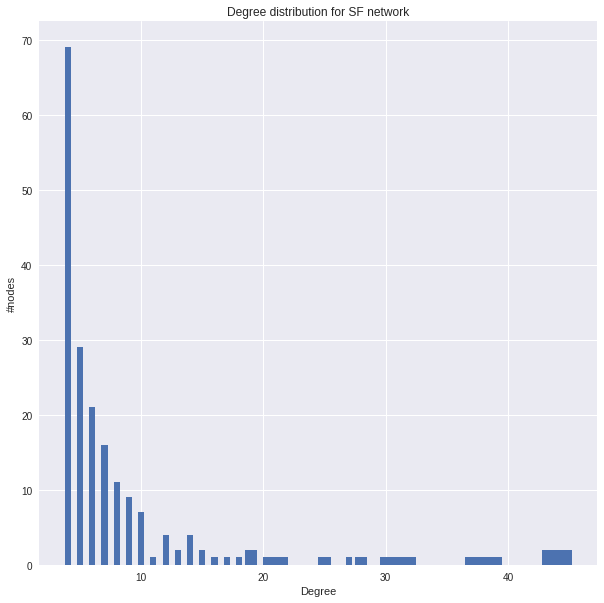

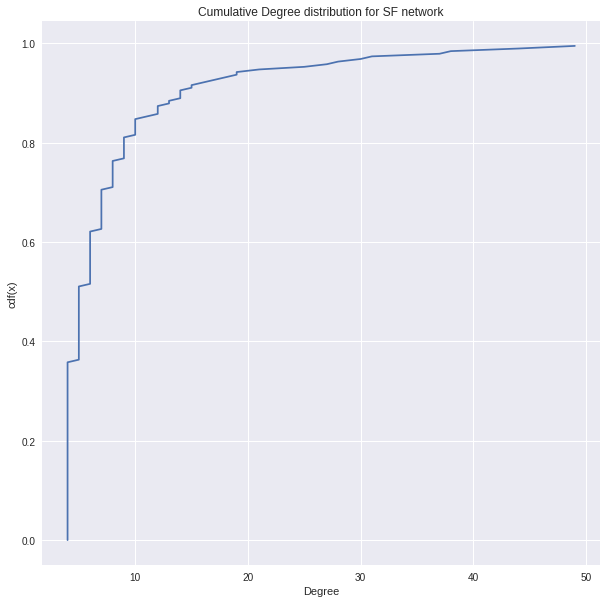

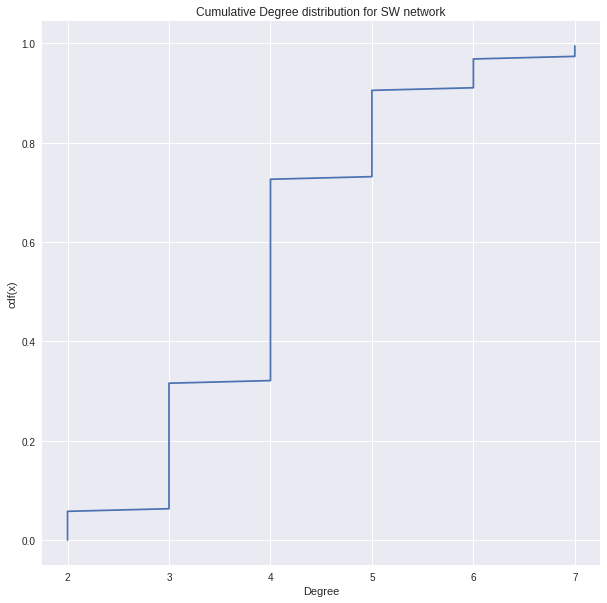

In [0]:
values = {
    "REG":REG_degree.values(),
    "RGER":RGER_degree.values(),
    "RGG":RGG_degree.values(),
    "SF":SF_degree.values(),
    "SW":SW_degree.values()
}

bins = {
    "REG":sorted(set(REG_degree.values())),
    "RGER":sorted(set(RGER_degree.values())),
    "RGG":sorted(set(RGG_degree.values())),
    "SF":sorted(set(SF_degree.values())),
    "SW":sorted(set(SW_degree.values()))
}

n=190

for x in values.keys():
  plt.figure()
  plt.title("Degree distribution for " + x + " network")
  plt.xlabel("Degree")
  plt.ylabel("#nodes")
  plt.hist(values[x],bins[x], histtype='bar', rwidth=0.5, align="left")


  X = np.sort(np.array(list(values[x])))
  Y = np.array(range(n))/float(n)

  plt.figure()
  plt.title("Cumulative Degree distribution for " + x + " network")
  plt.xlabel("Degree")
  plt.ylabel("cdf(x)")
  plt.plot(X,Y)


##### 3)  Calculate the average node degree and its variance 

In [0]:
for key in values.keys():
  print(UNDERLINE + key+ ' network:' + END)
  mean = np.mean(list(values[key]))
  print("The average degree is: %f"  %mean  )
  var = np.var(list(values[key]))
  print("The variance is: %f" %var)

REG network:
The average degree is: 4.000000
The variance is: 0.000000
RGER network:
The average degree is: 7.894737
The variance is: 6.304709
RGG network:
The average degree is: 28.557895
The variance is: 50.530859
SF network:
The average degree is: 7.831579
The variance is: 48.940055
SW network:
The average degree is: 4.000000
The variance is: 1.178947


<b>Comments on the above results on Β1, Β2, Β3.</b>

<ol>
  <li> <u>REG NETWORK</u> </li>
  The results above were as expected. While creating the REGULAR graph we set the node degree parameter to 4, so the results on B1 are precise. On B2 we can see that the histogram is empty, which is expected as we need 2 or more bins in order for it to be plotted and here we have only one bin for the unique degree value of 4. In addition, at second plot we can see that all of the nodes have at most degree 4 (and we know that they have exactly 4). At last, on B3 we can verify the validity of our results since as we can see the average degree value is exactly 4 and the variance is zero.
  <li> <u>RGER NETWORK</u> </li>
  In the case of the Erdos-Renyi Random Graph we can see that node degrees of the graph are random. Futhermore, we know that the expected average node degree value is:  $$z = {2*M \over N} = 7.89 $$ which as we can see agrees with our results on B3 and the values for the node degrees we have on the plots on B1 and B2.
  <li> <u>RGG NETWORK</u> </li>
  In a Random Geometric Graph, every node connects with its neighbors if they are inside a given radius on the plane. Knowing that, the results we see on B1 and B2 are expected. In addition, the RGG is known to have high variance, which agrees with our calculations. Finally, the expected average deegree value is calculated by the following formula: $$z = {π r^2 \over L^2}n = 37.3 $$ As we can see there is a slight deviation between the expected value and the one we calculate on B3.
  <li> <u>SF NETWORK</u> </li>
  Scale Free Networks are known to have many nodes with low degree values and few nodes with high degree values. This is obvious if we look at the plots on both B1 and B2. Furthermore, the results we calculate on B3 are expected because of the "popular" and the "less popular" nodes.
  <li> <u>SW NETWORK</u> </li>
  In the case of the Small World Netowrk the results are again as expected. Since we use a Watts–Strogatz model, the construction of the SW graph begins from a Regular Graph with node degree 4 and probability of rewiring 0.3, which is a relatively small value. Therefore, we expected the average degree value to be close to 4. As we can see our expectations are satisfied both by the values we can see on the plots on B1 and B2, and the average degree value we calculate on B3 to be equal to 4, with also a very low variance value.
</ol>


### C) Weighted Networks

On a weighted netowrk, alike with the adjacency matrix, we define an array of weights, $W=[w_{ij}]$, where $w_{ij}>0$ is the weight of the edge that connects the nodes $i,j$. For undirected graphs, the above array is $W$ is symmetrical. 

Below we create a random weight array for each of our topologies (REG, RG(ER), RGG, SF(BA) and SW(WS)). The range of the weight values is $[1,10]$.

In [0]:
def create_weights_array(G):
  a=1
  b=10
  weights_array= np.zeros((n,n))
  for x in G.edges:
    temp = weight=np.random.rand()*(b-a) + a
    weights_array[x[0]][x[1]] = temp
    weights_array[x[1]][x[0]] = temp

  return weights_array

def add_weights(G , name):
  global weights
  for x in G.edges:
    G.add_edge(x[0],x[1], weight = weights[name][x[0]][x[1]])  
  return G




In [0]:
  weights = {
      "REG":create_weights_array(REG),
      "RGER":create_weights_array(RGER),
      "RGG":create_weights_array(RGG),
      "SF":create_weights_array(SF),
      "SW":create_weights_array(SW)
  }

In [0]:
REG = add_weights(REG, "REG")
RGER = add_weights(RGER, "RGER")
RGG = add_weights(RGG, "RGG")
SF = add_weights(SF, "SF")
SW = add_weights(SW, "SW")

##### i) Calculate the strength of each node

In [0]:
def strength(topology):
    weights_list=[]
    for i in range(0,len(topology.adj)):
        a=[]
        for j in range (0,len(topology.adj[i].items())):
            d=list(topology.adj[i].values())[j]        
            c=list(d.values())[0]                       
            a.append(c)
        weights_list.append(a)    
    node_weights = []
    for node in weights_list:
        node_weights.append(sum(node))
    return node_weights

REG_strength= strength(REG)
RGER_strength= strength(RGER)
RGG_strength= strength(RGG)
SF_strength= strength(SF)
SW_strength= strength(SW)

##### ii) Plot the cumulative strength distribution

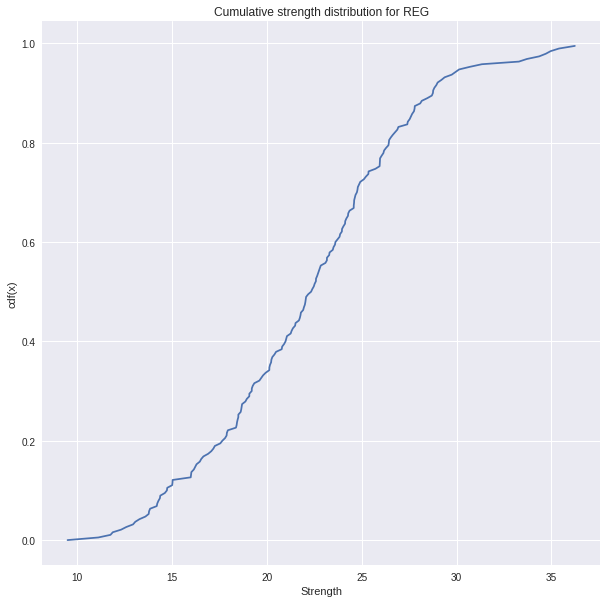

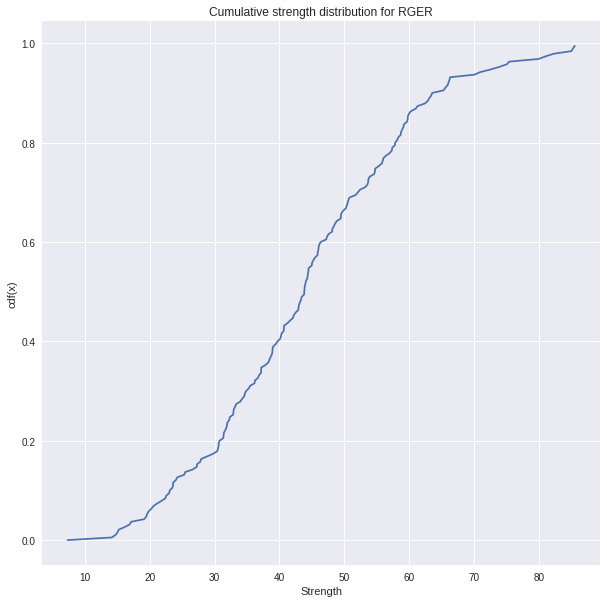

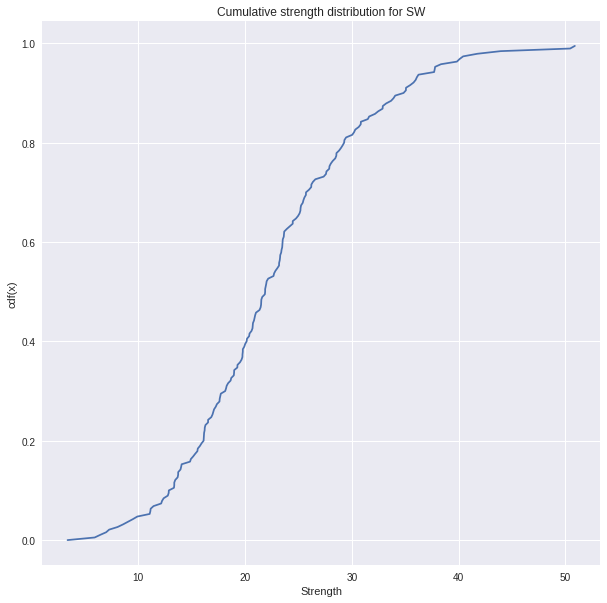

In [0]:
csd = {
    "REG": REG_strength,
    "RGER":RGER_strength,
    "RGG":RGG_strength,
    "SF":SF_strength,
    "SW":SW_strength
}

for topology in csd.keys():
  X = np.sort(np.array(csd[topology]))
  Y = np.array(range(n))/float(n)
  plt.figure()
  plt.title("Cumulative strength distribution for "+topology)
  plt.xlabel("Strength")
  plt.ylabel("cdf(x)")
  plt.plot(X, Y)

##### iii) Calculate the average strength values

In [0]:
average_strength = {
    "REG":np.mean(REG_strength),
    "RGER":np.mean(RGER_strength),
    "RGG":np.mean(RGG_strength),
    "SF":np.mean(SF_strength),
    "SW":np.mean(SW_strength)
}

for key in average_strength:
  print("Mean value of cumulative strengths for " + key + ":", end=" ")
  print(average_strength[key])



Mean value of cumulative strengths for REG: 22.08744615128403
Mean value of cumulative strengths for RGER: 43.972358530602556
Mean value of cumulative strengths for RGG: 157.78607986583535
Mean value of cumulative strengths for SF: 43.06277189905547
Mean value of cumulative strengths for SW: 22.648763481380175


<b>Comment the results of C1, C2, C3.</b>

First of all, we know that the strength of a node is defined as the sum of the weights of its edges.

Based on the results both on the plots on C1 and C2, and the calculations on C3,we can see that the highest value of average strength is found on the Random Geometric Graph (RGG). This is because on a RGG, there are areas the form cliques and we know that all of the nodes inside a clique are connected which results to nodes with high degree values and therefore higher strength values (given the fact that the weights are installed randomly from a uniform distribution).

On the other hand, we can see that the lowest average value of strength appears on the Regular Graph, followed by the Small World Network. This is because on Regular Graphs, the node degrees are constant and in our case equal to 4. Therefore only 4 edges contribute to the strength value of each node with their weights. In addition, we created the Small World Network with a probability of rewiring equal to 0.3, wich is a relatively low value. This leads to the observation that on the SW graph, there are no nodes with high degree value, wich verifies our observations on B2. 

Finally, we can see that the average strength value of the Scale-Free Network is twice the value of that on SW. This is because of the "popular" nodes with high degree values and therefore high strength values. We can also check this observation at the plot on C2 where most of the nodes have relatively low strength value whereas few of them have very high values.

### D) Calculate the average path length

We calculate the average path length and its variance for each of our topologies on table1 (REG, RG(ER), RGG, SF(BA) and SW(WS)). Then we will present the cumulative results and make comparisons between the topologies above based on those results.

In [0]:
def compute_path_lengths(G):
  lengths = np.zeros((len(G),len(G)))
  shortest_paths = list(nx.all_pairs_shortest_path_length(G))

  for i in range(len(shortest_paths)):
    for [key,val] in shortest_paths[i][1].items():
      lengths[i][key] = val
      lengths[key][i] = val 

  return lengths


REG_path_lengths = compute_path_lengths(REG)
RGER_path_lengths = compute_path_lengths(RGER)
RGG_path_lengths = compute_path_lengths(RGG)
SF_path_lengths = compute_path_lengths(SF)
SW_path_lengths = compute_path_lengths(SW)


print("Mean path length REG: %f" %np.mean(REG_path_lengths))
print("Variance of path length REG: %f \n" %np.var(REG_path_lengths))

print("Mean path length RGER: %f" %np.mean(RGER_path_lengths))
print("Variance of path length RGER: %f \n" %np.var(RGER_path_lengths))

print("Mean path length RGG: %f" %np.mean(RGG_path_lengths))
print("Variance of path length RGG: %f \n" %np.var(RGG_path_lengths))

print("Mean path length SF: %f" %np.mean(SF_path_lengths))
print("Variance of path length SF: %f \n" %np.var(SF_path_lengths))

print("Mean path length SW: %f" %np.mean(SW_path_lengths))
print("Variance of path length SW: %f \n" %np.var(SW_path_lengths))

Mean path length REG: 24.000000
Variance of path length REG: 188.126316 

Mean path length RGER: 2.736177
Variance of path length RGER: 0.508569 

Mean path length RGG: 2.782548
Variance of path length RGG: 1.407507 

Mean path length SF: 2.564820
Variance of path length SF: 0.426186 

Mean path length SW: 4.365263
Variance of path length SW: 1.676611 



First of all, its important to notice that the highest average path length appears, as we expected, on the REG network since each node is connected to its d neighbors and its constant for a specific number and degree of nodes. We can calculate it using the following formula: $$C_i = {\sum_{i,j}{d(u_i,u_j)} \over n(n -1) } $$ We can also see that the variance of the path length is high since on Regular Graphs the neighbor nodes connect with path length equal to 1 and its progressively increasing up to $ n \over 4 $.

The results about the RG were also expected. The low value of average path length is due to the randomness of edge creation which forms "shortcuts", and also the uniform choosing of edges leads to symmetry and therefore low variance for the path lengths.

On the other hand, the results about the average path length are different from what we know about the Small World graphs. Generally, SW graphs have low average path length due to the creation of "shortcuts" by edge rewiring. However, in our case the result could be justified by the small probability of rewiring we set while creating the model, which leads to less shortcuts.

In addition, the average path legnth we calculated for the RGG was unexpected. Due to the creation of cliques at those graphs, the average path length increases since each member of a clique is usually far apart from each member of another clique. In our case though, its possible that we have used a high radius value while creating the model and small number of nodes which leads to a low average path length.

Finally, we expected the deviation of the average path length we calculated for the SF graph to the one we calculated for the RGER, to be higher. The small number of nodes is probably the reason for the unexpected results above.



### E) Calculate Clustering Coefficient (CC)

##### 1) Calculation of CC in toy graphs
For each of the topologies below, calculate in detail the local CC of each node and plot the distribution of the local CC. Then, calculate the average global CC of each of the topologies on table1 and compare them. 

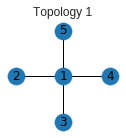

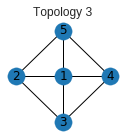

In [0]:
plt.figure(1, figsize=(2,2))
plt.title('Topology 1')
G = nx.Graph()
pos = {0: (1, 1), 1: (0, 1), 2: (1, 0), 3: (2, 1), 4: (1, 2)}
G.add_nodes_from(pos.keys())
G.add_edges_from([(0,1),(0,2),(0,3),(0,4)])
labels = {}
labels[0] = r'$1$'
labels[1] = r'$2$'
labels[2] = r'$3$'
labels[3] = r'$4$'
labels[4] = r'$5$'
nx.draw_networkx_labels(G, pos, labels)
nx.draw(G,pos)

plt.figure(2,figsize=(2,2))
plt.title('Topology 2')
G = nx.Graph()
pos = {0: (1, 1), 1: (0, 0), 2: (2, 0), 3: (2, 2), 4: (0, 2)}
G.add_nodes_from(pos.keys())
G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(1,2),(3,4)])
labels = {}
labels[0] = r'$1$'
labels[1] = r'$2$'
labels[2] = r'$3$'
labels[3] = r'$4$'
labels[4] = r'$5$'
nx.draw_networkx_labels(G, pos, labels)
nx.draw(G, pos)

plt.figure(3,figsize=(2,2))
plt.title('Topology 3')
G = nx.Graph()
pos = {0: (1, 1), 1: (0, 1), 2: (1, 0), 3: (2, 1), 4: (1, 2)}
G.add_nodes_from(pos.keys())
G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(1,2),(2,3),(3,4),(4,1)])
labels = {}
labels[0] = r'$1$'
labels[1] = r'$2$'
labels[2] = r'$3$'
labels[3] = r'$4$'
labels[4] = r'$5$'
nx.draw_networkx_labels(G, pos, labels)
nx.draw(G,pos)

<h4>Calculate CC in detail</h4>
We use the following formula to calculate the local clustering coefficient:
$$C_i = {2L_i \over k_i(k_i -1) } $$
where $k_i$ is the degree of node i and $L_i$ is the number of edges between a pair of nodes of the $k_i$ neighbors (number of closed triplets).
<p>Topology 1<p>
<ol>
<li> Node 1: $C_1 = {2 \cdot 0 \over 4 \cdot 3} = 0$ </li>
<li> Node: $C_2 = {2 \cdot 0 \over 1 \cdot (1-1)} = 0$ </li>
<li> Node 3: $C_3 = {2 \cdot 0 \over 1 \cdot (1-1)} = 0$ </li>
<li> Node 4: $C_4 = {2 \cdot 0 \over 1 \cdot (1-1)} = 0$ </li>
<li> Node 5: $C_5 = {2 \cdot 0 \over 1 \cdot (1-1)} = 0$ </li>
</ol>

<p>Topology 2<p>
<ol>
<li> Node 1: $C_1 = {2 \cdot 2 \over 4 \cdot 3} = 0.33$ </li>
<li> Node 2: $C_2 = {2 \cdot 1 \over 2 \cdot 1} = 1$ </li>
<li> Node 3: $C_3 = {2 \cdot 1 \over 2 \cdot 1} = 1$ </li>
<li> Node 4: $C_4 = {2 \cdot 1 \over 2 \cdot 1} = 1$ </li>
<li> Node 5: $C_5 = {2 \cdot 1 \over 2 \cdot 1} = 1$ </li>
</ol>
<p>Topology 3</p>
<ol>
<li> Node 1: $C_1 = {2 \cdot 4 \over 4 \cdot 3} = 0.66$ </li>
<li> Node 2: $C_2 = {2 \cdot 2 \over 3 \cdot 2} = 0.66$ </li>
<li> Node 3: $C_3 = {2 \cdot 2 \over 3 \cdot 2} = 0.66$ </li>
<li> Node 4: $C_4 = {2 \cdot 2 \over 3 \cdot 2} = 0.66$ </li>
<li> Node 5: $C_5 = {2 \cdot 2 \over 3 \cdot 2} = 0.66$ </li>
</ol>

We use the following formula to calculate the average global CC of each topology:
$$ \overline{C} = {1 \over n} \sum_{i=1}^n{C_i} $$ 

Topology 1
$$ \overline{C} = {1 \over 5} (0+0+0+0+0) = 0 $$ 

Topology 2
$$ \overline{C} = {1 \over 5} (0.33+1+1+1+1) = 0.866 $$ 

Topology 3
$$ \overline{C} = {1 \over 5} (0.66+0.66+0.66+0.66+0.66) = 0.66 $$ 

##### 2) Calculate the CC on complex topologies

For each of the topologies on table1 (REG, RG(ER), RGG, SF(BA) and SW(WS)), calculate the local clustering coefficient of each node, plot the cumulative distribution of the CC and comment on your results.


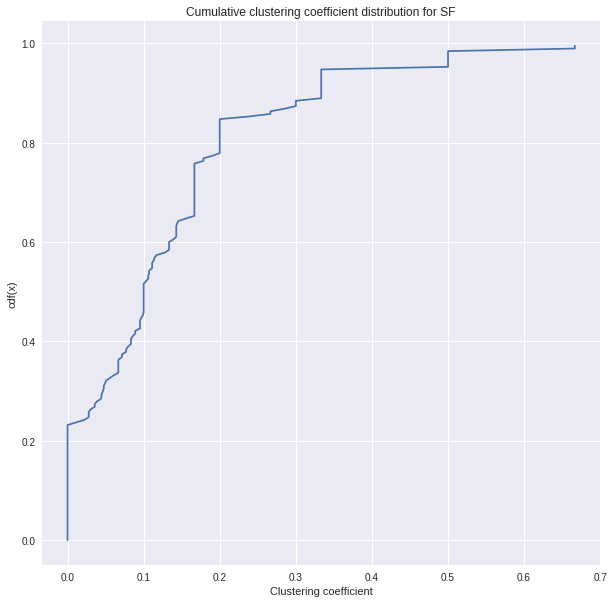

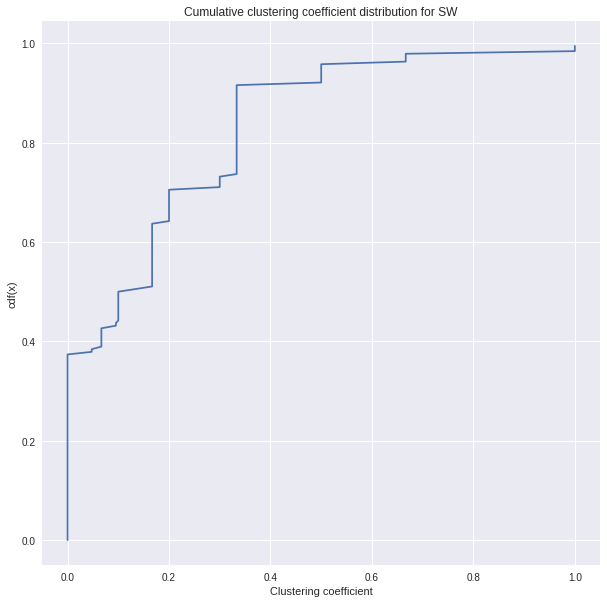

In [0]:
def calculate_clust_coef(G):
  return nx.clustering(G)


clust_coef = {}
clust_coef['REG'] = calculate_clust_coef(REG)
clust_coef['RGER'] = calculate_clust_coef(RGER)
clust_coef['RGG'] = calculate_clust_coef(RGG)
clust_coef['SF'] = calculate_clust_coef(SF)
clust_coef['SW'] = calculate_clust_coef(SW)


for topology in clust_coef.keys():
  X = np.sort(np.array(list(clust_coef[topology].values())))
  Y = np.array(range(n))/float(n)
  plt.figure()
  plt.title("Cumulative clustering coefficient distribution for "+topology)
  plt.xlabel("Clustering coefficient")
  plt.ylabel("cdf(x)")
  plt.plot(X, Y)

Then, calculate and compare the average global clustering coefficients of each topology.

In [0]:
print("Mean clustering coefficient REG: %f" %nx.average_clustering(REG))
print("Mean clustering coefficient RGER: %f" %nx.average_clustering(RGER))
print("Mean clustering coefficient RGG: %f" %nx.average_clustering(RGG))
print("Mean clustering coefficient SF: %f" %nx.average_clustering(SF))
print("Mean clustering coefficient SW: %f" %nx.average_clustering(SW))

Mean clustering coefficient REG: 0.500000
Mean clustering coefficient RGER: 0.034842
Mean clustering coefficient RGG: 0.667674
Mean clustering coefficient SF: 0.129576
Mean clustering coefficient SW: 0.167118


Clustering coefficient is a metric that quantifies the ability of a node's neighbors to form a clique. 

As we can see, the lowest value of average CC appears on the RGER and it is because of the way it is created. The nodes are connected randomly and therefore don't form cliques. On the other hand, as expected the highest value of average CC appears on the RGG. These is due to the fact that on RGGs, the nodes are structured in "groups" on the plane accordingly to the radius we set and therefore form cliques.

In addition, a high value of clustering coefficient is found on REG. On REGs, each node can create a clique with its d neighbors, where d is the number of neigbors we set while creating the model. 

Based on our results, the average clustering coefficient of the SF graph is low. This was expected since on SF graphs, we have many nodes connected to the "popular" nodes but not connected with each other in order to form cliques.

Finally, we calculated a high value for the average clustering coefficient of the SW graph. This result was expected since as we know on SW graphs there are many triplets of nodes which usually form cliques.
 

### F) Calculate centralities of nodes

##### 1) Calculation of centralities in toy graphs

For each of the following toy networks, calculate in detail the following centality metrics:
- degree centrality
- closeness centrality
- betweenness centrality

and compare your results.

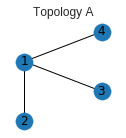

In [0]:
plt.figure(1,figsize=(2,2))
plt.title("Topology A")
G = nx.Graph()
pos = {0: (1, 1), 1: (1, 0), 2: (1.5, 0.5), 3: (1.5, 1.5)}
G.add_nodes_from(pos.keys())
G.add_edges_from([(0,1),(0,2),(0,3)])
labels = {}
labels[0] = r'$1$'
labels[1] = r'$2$'
labels[2] = r'$3$'
labels[3] = r'$4$'
nx.draw_networkx_labels(G, pos, labels)
nx.draw(G,pos)

plt.figure(2,figsize=(2,2))
plt.title("Topology B")
pos = {0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (0, 1)}
G.add_nodes_from(pos.keys())
G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)])
labels = {}
labels[0] = r'$1$'
labels[1] = r'$2$'
labels[2] = r'$3$'
labels[3] = r'$4$'
nx.draw_networkx_labels(G, pos, labels)
nx.draw(G,pos)


<u>Degree Centrality</u>: The degree centrality of each node is equal to the degree of the node over the maximum number of neighbors it could have (n-1). We calculate it using the following formula: $$ C(u) = {deg(u) \over n-1} $$

<u>Closeness Centrality</u>: The closeness centrality of each node is equal to the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Calculation formula: $$ C(x) = {n-1 \over \sum_yd(y,x)} $$

<u>Betweenness Centrality</u>: The betweenness centrality of a node quantifies the number of times that the node operates as a bridge in the shortest path between a pair of nodes. The calculation formula is the following:  
$$ C_B(u) = \sum_{s \neq u \neq t \in V} {\sigma_{st}(u) \over \sigma_{st} } $$
where $ \sigma_{st} $ is the number of shortest paths between nodes st and  $ \sigma_{st}(u) $ is the number of shortest paths between nodes st that include node u.

<p>Topology A </p>
<ol>
<li> Degree Centrality = $ 3 \over (4-1) $ = 1, Closeness Centrality = $ 3 \over 3 $ = 1 , Betweenness Centrality = 3</li>
<li> Degree Centrality = $ 1 \over 3 $ = 0.33, Closeness Centrality = $ 3 \over 5 $ = 0.6  , Betweenness Centrality = 0</li>
<li> Degree Centrality = $ 1 \over 3 $ = 0.33, Closeness Centrality = $ 3 \over 5 $ = 0.6  , Betweenness Centrality = 0</li>
<li> Degree Centrality = $ 1 \over 3 $ = 0.33, Closeness Centrality = $ 3 \over 5 $ = 0.6  , Betweenness Centrality = 0</li>
</ol>
<p>Node 1:</p>
<ul> 
<li>The degree centrality of node 1 equals to 3 because it has 3 edges. </li>
<li>The closeness centrality equals to 1 because the node is connected to all the other nodes via 1 hop.</li>
<li>The betweenness centrality equals to 3 because node 1 is 
intermediate on the shortest paths between 2-3, 3-4 and 2-4.</li>
<br>The results for the rest of the nodes are calculated likewise.
</ul>

<p>Topology B </p>
<ol>
<li> Degree Centrality = $ 3 \over (4-1) $ = 1, Closeness Centrality = $ 3 \over 3 $ = 1 , Betweenness Centrality = ($ 0 \over 1 $ + $ 0 \over 1 $ + $ 0 \over 1 $) = 0</li>
<li> Degree Centrality = $ 3 \over 3 $ = 1, Closeness Centrality = $ 3 \over 3 $ = 1  , Betweenness Centrality = ($ 0 \over 1 $ + $ 0 \over 1 $ + $ 0 \over 1 $) = 0</li>
<li> Degree Centrality = $ 3 \over 3 $ = 1, Closeness Centrality = $ 3 \over 3 $ = 1  , Betweenness Centrality = ($ 0 \over 1 $ + $ 0 \over 1 $ + $ 0 \over 1 $) = 0</li>
<li> Degree Centrality = $ 3 \over 3 $ = 1, Closeness Centrality = $ 3 \over 3 $ = 1  , Betweenness Centrality = ($ 0 \over 1 $ + $ 0 \over 1 $ + $ 0 \over 1 $) = 0</li>
</ol>

<p>Ενδεικτικός σχολιασμός:</p>
The second topology forms a clique which means that the results we calculate for one of the nodes, are the same for the rest. The degree centrality equals to 1 because each node has 3 edges. The closeness centrality is also 1 since all of the nodes are connected with each other with one hop. Finally, the betweeness centrality as expected is equal to zero since the nodes form a clique and each node is not intermediate to any shortest path.  

##### 2) Calculate the centralities on complex netowrks

For each of the topologies on table1 (REG, RG(ER), RGG, SF(BA) and SW(WS)), calculate the local centrality of each node, plot the cumulative distribution of the centralities and compare your results for the following centrality metrics:

- degree centrality
- closeness centrality
- betweenness centrality
- eigenvector centrality

In [0]:
def calculate_degree_centrality(G):
  degree_centrality = nx.degree_centrality(G)
  return degree_centrality

def calculate_closeness_centrality(G):
  closeness_centrality = nx.closeness_centrality(G)
  return closeness_centrality

def calculate_betweenness_centrality(G):
  betweenness_centrality = nx.betweenness_centrality(G)
  return betweenness_centrality

def calculate_eigenvector_centrality(G):
  eigenvector_centrality = nx.eigenvector_centrality(G)
  return eigenvector_centrality

REG_degree_centrality = calculate_degree_centrality(REG)
REG_closeness_centrality = calculate_closeness_centrality(REG)
REG_betweenness_centrality = calculate_betweenness_centrality(REG)
REG_eigenvector_centrality = calculate_eigenvector_centrality(REG)

RGER_degree_centrality = calculate_degree_centrality(RGER)
RGER_closeness_centrality = calculate_closeness_centrality(RGER)
RGER_betweenness_centrality = calculate_betweenness_centrality(RGER)
RGER_eigenvector_centrality = calculate_eigenvector_centrality(RGER)

RGG_degree_centrality = calculate_degree_centrality(RGG)
RGG_closeness_centrality = calculate_closeness_centrality(RGG)
RGG_betweenness_centrality = calculate_betweenness_centrality(RGG)
RGG_eigenvector_centrality = calculate_eigenvector_centrality(RGG)

SF_degree_centrality = calculate_degree_centrality(SF)
SF_closeness_centrality = calculate_closeness_centrality(SF)
SF_betweenness_centrality = calculate_betweenness_centrality(SF)
SF_eigenvector_centrality = calculate_eigenvector_centrality(SF)

SW_degree_centrality = calculate_degree_centrality(SW)
SW_closeness_centrality = calculate_closeness_centrality(SW)
SW_betweenness_centrality = calculate_betweenness_centrality(SW)
SW_eigenvector_centrality = calculate_eigenvector_centrality(SW)


def plot_centrality(centrality, c_type):
  Y = np.array(range(n))/float(n)

  plt.figure(figsize=(10,10))
  plt.title("Cumulative " + c_type + " centralities distribution")
  plt.xlabel(c_type + " centrality")
  plt.ylabel("cdf(x)")
  plt.plot(np.sort(np.array(list(centrality["REG"].values()))), Y ,color="red", label="REG")
  plt.plot(np.sort(np.array(list(centrality["RGER"].values()))), Y ,color="blue", label="RGER")
  plt.plot(np.sort(np.array(list(centrality["RGG"].values()))), Y ,color = "yellow", label="RGG")
  plt.plot(np.sort(np.array(list(centrality["SF"].values()))), Y , color="green", label="SF")
  plt.plot(np.sort(np.array(list(centrality["SW"].values()))), Y , color="black", label="SW")
  plt.legend(loc="best")
  return None


In [0]:
degree_centralities = {
    "REG": REG_degree_centrality,
    "RGER": RGER_degree_centrality,
    "RGG": RGG_degree_centrality,
    "SF": SF_degree_centrality,
    "SW": SW_degree_centrality
}
closeness_centralities = {
    "REG": REG_closeness_centrality,
    "RGER": RGER_closeness_centrality,
    "RGG": RGG_closeness_centrality,
    "SF": SF_closeness_centrality,
    "SW": SW_closeness_centrality
}
betweenness_centralities = {
    "REG": REG_betweenness_centrality,
    "RGER": RGER_betweenness_centrality,
    "RGG": RGG_betweenness_centrality,
    "SF": SF_betweenness_centrality,
    "SW": SW_betweenness_centrality
}
eigenvector_centralities = {
    "REG": REG_eigenvector_centrality,
    "RGER": RGER_eigenvector_centrality,
    "RGG": RGG_eigenvector_centrality,
    "SF": SF_eigenvector_centrality,
    "SW": SW_eigenvector_centrality
}
plot_centrality(degree_centralities, "Degree")
plot_centrality(closeness_centralities, "Closeness")
plot_centrality(betweenness_centralities, "Betweenness")
plot_centrality(eigenvector_centralities, "Eigenvector")

Then, calculate and compare the average centrality for each of the topologies for all the metrics.

In [0]:
 print("--- Degree centrality ---")
 print("Mean degree centrality REG: %f" %np.mean([x[1] for x in REG_degree_centrality.items()]))
 print("Mean degree centrality RGER: %f" %np.mean([x[1] for x in RGER_degree_centrality.items()]))
 print("Mean degree centrality RGG: %f" %np.mean([x[1] for x in RGG_degree_centrality.items()]))
 print("Mean degree centrality SF: %f" %np.mean([x[1] for x in SF_degree_centrality.items()]))
 print("Mean degree centrality SW: %f" %np.mean([x[1] for x in SW_degree_centrality.items()]))
 print()

 print("--- Closeness centrality ---")
 print("Mean closeness centrality REG: %f" %np.mean([x[1] for x in REG_closeness_centrality.items()]))
 print("Mean closeness centrality RGER: %f" %np.mean([x[1] for x in RGER_closeness_centrality.items()]))
 print("Mean closeness centrality RGG: %f" %np.mean([x[1] for x in RGG_closeness_centrality.items()]))
 print("Mean closeness centrality SF: %f" %np.mean([x[1] for x in SF_closeness_centrality.items()]))
 print("Mean closeness centrality SW: %f" %np.mean([x[1] for x in SW_closeness_centrality.items()]))
 print()

 print("--- Betweenness centrality ---")
 print("Mean betweenness centrality REG: %f" %np.mean([x[1] for x in REG_betweenness_centrality.items()]))
 print("Mean betweenness centrality RGER: %f" %np.mean([x[1] for x in RGER_betweenness_centrality.items()]))
 print("Mean betweenness centrality RGG: %f" %np.mean([x[1] for x in RGG_betweenness_centrality.items()]))
 print("Mean betweenness centrality SF: %f" %np.mean([x[1] for x in SF_betweenness_centrality.items()]))
 print("Mean betweenness centrality SW: %f" %np.mean([x[1] for x in SW_betweenness_centrality.items()]))
 print()

 print("--- Eigenvector centrality ---")
 print("Mean eigenvector centrality REG: %f" %np.mean([x[1] for x in REG_eigenvector_centrality.items()]))
 print("Mean eigenvector centrality RGER: %f" %np.mean([x[1] for x in RGER_eigenvector_centrality.items()]))
 print("Mean eigenvector centrality RGG: %f" %np.mean([x[1] for x in RGG_eigenvector_centrality.items()]))
 print("Mean eigenvector centrality SF: %f" %np.mean([x[1] for x in SF_eigenvector_centrality.items()]))
 print("Mean eigenvector centrality SW: %f" %np.mean([x[1] for x in SW_eigenvector_centrality.items()]))

--- Degree centrality ---
Mean degree centrality REG: 0.021164
Mean degree centrality RGER: 0.041771
Mean degree centrality RGG: 0.151100
Mean degree centrality SF: 0.041437
Mean degree centrality SW: 0.021164

--- Closeness centrality ---
Mean closeness centrality REG: 0.041447
Mean closeness centrality RGER: 0.365000
Mean closeness centrality RGG: 0.363585
Mean closeness centrality SF: 0.391323
Mean closeness centrality SW: 0.229481

--- Betweenness centrality ---
Mean betweenness centrality REG: 0.123016
Mean betweenness centrality RGER: 0.009312
Mean betweenness centrality RGG: 0.009560
Mean betweenness centrality SF: 0.008396
Mean betweenness centrality SW: 0.018023

--- Eigenvector centrality ---
Mean eigenvector centrality REG: 0.072548
Mean eigenvector centrality RGER: 0.067823
Mean eigenvector centrality RGG: 0.060042
Mean eigenvector centrality SF: 0.056796
Mean eigenvector centrality SW: 0.060735


<p> Comments: </p>

First of all, we can see that the Regular Graph has the lowset value of closeness centrality and a relatively small value of betweenness centrality. This is because of the fast that the distances of the nodes are progressively increasing. Also, for each pair of far apart nodes, the are multiple alternative shortest paths. In addition, the degree centrality is constant and it could be calculated by dividing the number of neighbors we set while creating the model over the reduced by 1, number of edges.

Additionally, its important to notice that the closeness, betweenness and eigenvector centralities for the following graphs
- RGER
- RGG
- SF
 
have small deviations whilst all of the graphs have different structres and features.

Finally, the SW graph has the lowset value of closeness centrality but a high value of betweenness centrality due to the rewiring of the edges.

### G)Connectivity and Threshold Behavior

The connectivity percentage of a complex graph is calculated as the fraction of the connected graphs over the total number of graphs.

Using the parameters on the table2, study the connectivity of each graph from table1.


<table width="80%">
    <thead>
        <tr>
            <th width="20%">Topology</th>
            <th width="20%">Range</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >REG</td>
            <td rowspan=6>$n = \{100, 200\}$</td>
            <td>$d \in [2,10]$ with step $2$</td>
        </tr>
        <tr>
            <td>RGER</td>
            <td>$M \in [100,800]$ with step $100$</td>
        </tr>
        <tr>
            <td>RG</td>
            <td>$p \in [0.1,0.9]$ with step $0.1$</td>
        </tr>
        <tr>
            <td>RGG</td>
            <td>$R \in [0.025,0.25]$ with step $0.025$ and $L=1$</td>
        </tr>
        <tr>
            <td>SF</td>
            <td>$d \in [2,10]$ with step $2$</td>
        </tr>
        <tr>
            <td>SW</td>
            <td>$d \in [2,10]$ with step $2$ and $g_p \in [0.1,0.7]$ with step $0.1$</td>
        </tr>
    </tbody>
    <caption>Table 2</caption>
</table>

For each type of network, produce 100 different topologies and plot the connectivity percentage in regard to the parameters on table2.

In [0]:
#Connectivity check for REG
y = np.zeros(10)

for n in [100,200]:
  for d in range (2,11,2):
    for i in range (0,100):
      REG_temp= nx.watts_strogatz_graph(n, d, 0)
      if nx.is_connected(REG_temp):
        if n==100: 
          y[d//2 -1] = y[d//2 -1] + 1
        else:
          y[d//2 +4] = y[d//2 +4] + 1

#plot example:
plt.plot(list(range(2,12,2)),y[0:5]/100, color='b', label="100 nodes")
plt.plot(list(range(2,12,2)),y[5:10]/100, color='r', label="200 nodes")
plt.title("Connectivity percentage for REG")
plt.ylabel("Connectivity percentage" )
plt.xlabel("Degree")
plt.legend(loc="best")
plt.show()


Comment on the results for REG:

We can see that for different values of node degree, the Regular Graph stays connected regardless of the number of nodes. Based on the way that a regular graph is constructed, this result was expected.


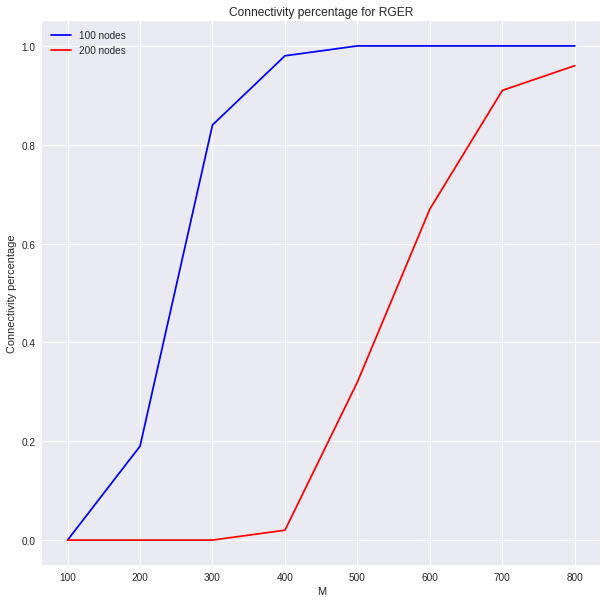

In [0]:
#Connectivity check for RGER
y = np.zeros(16)

for n in [100,200]:
  for M in range (100,801,100):
    for i in range (0,100):
        RGER_temp= nx.gnm_random_graph(n, M) 
        if nx.is_connected(RGER_temp):
          if n==100: 
            y[M//100 -1] = y[M//100 -1] + 1
          else:
            y[M//100 +7] = y[M//100 +7] + 1

#plot example:
plt.plot(list(range(100,900,100)),y[0:8]/100, color='b', label="100 nodes")
plt.plot(list(range(100,900,100)),y[8:16]/100, color='r', label="200 nodes")
plt.title("Connectivity percentage for RGER")
plt.ylabel("Connectivity percentage")
plt.xlabel("M")
plt.legend(loc="best")
plt.show()

Comment on the results for RGER:

We can see that there is a threshold behavior on RGER in regard to the connectivity. The breaking points for the parameter M for which we observe increasing in the connectivity are not the same for different number of nodes. In addition, we can see spikes for the connectivity percentage at those breaking points. Also, its important to notice that when the number of nodes is equal to 200, the graph is never connected for the values range given for the parameter M. It reaches a connectivity percentage up to 95%.

In [0]:
#Connectivity check for RG Gilbert
y = np.zeros(18)

for n in [100,200]:
  for p in range (1,10, 1):
    for i in range (0,100):
      RG_gil_temp= nx.gnp_random_graph(n,p/10)
      if nx.is_connected(RG_gil_temp):
        if n==100:
          y[p -1] = y[p -1] + 1
        else:
          y[p +8] = y[p +8] + 1

#plot example:
plt.plot(np.arange(0.1, 1.0, 0.1),y[0:9]/100, color='b' , label="100 nodes")
plt.plot(np.arange(0.1, 1.0, 0.1),y[9:18]/100, color='r' , label="200 nodes")
plt.title("Connectivity percentage for RG Gilbert")
plt.ylabel("Connectivity percentage")
plt.xlabel("p")
plt.legend(loc="best")
plt.show()

Comment on the results for RG Gilbert:

As we can see the RG Gilbert is always connected for the range of the parameter p we were given regardless the number of nodes. However, this result was not expected due to its analogy with the RGER network. We could calculate though the breaking points for the p parameter on the RGER network, because it is possible that there is a threshold behavior for lower values of p than 0.1 .


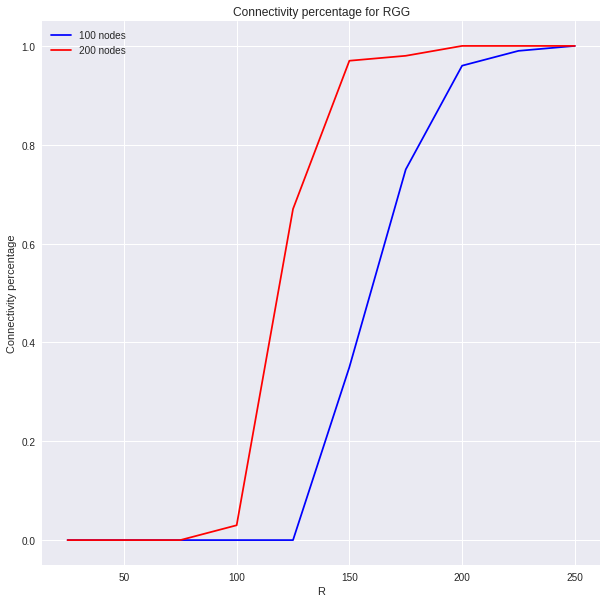

In [0]:
#Connectivity check for RGG
y = np.zeros(20)
L = 1000

for n in [100,200]:
  for R in range (25,251, 25):
    for i in range(0,100):
      RGG_temp= nx.random_geometric_graph(n, R/1000, 2)
      if nx.is_connected(RGG_temp):
        if n==100:
          y[R//25 -1] = y[R//25 -1] + 1
        else:
          y[R//25 +9] = y[R//25 +9] + 1

#plot example:
plt.plot(list(range(25,251, 25)),y[0:10]/100, color='b', label="100 nodes")
plt.plot(list(range(25,251, 25)),y[10:20]/100, color='r', label="200 nodes")
plt.title("Connectivity percentage for RGG")
plt.ylabel("Connectivity percentage")
plt.xlabel("R")
plt.legend(loc="best")
plt.show()

Comment on the results for RGG:

The threshold behavior is also noticable here in regard to the parameter R and its different for different number of nodes. We can also see a sharp peak for the transition to connectivity.

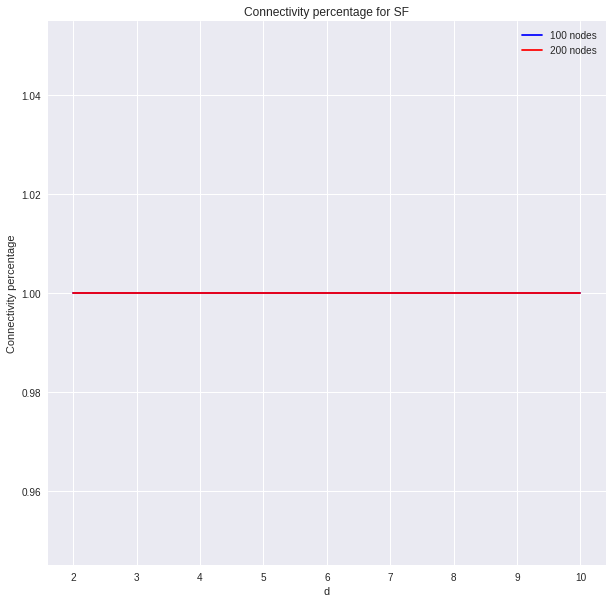

In [0]:
#Connectivity check for SF
y = np.zeros(10)

for n in [100,200]:
  for d in range (2,11, 2):
    for i in range (0,100):
      SF_temp = nx.barabasi_albert_graph(n,d)
      if nx.is_connected(SF_temp):
        if n==100:
          y[d//2 - 1 ] = y[d//2 -1] + 1
        else:
          y[d//2 +4 ] = y[d//2 +4] + 1

#plot example:
plt.plot(list(range(2,11, 2)),y[0:5]/100, color='b', label="100 nodes")
plt.plot(list(range(2,11, 2)),y[5:10]/100, color='r', label="200 nodes")
plt.title("Connectivity percentage for SF")
plt.ylabel("Connectivity percentage")
plt.xlabel("d")
plt.legend(loc="best")
plt.show()

Comment on the results for SF:

Regardless of the values of the parameters we set, the SF graph stays connected. This is due to way that the SF graphs are constructed. Many nodes are connected to the "popular" ones which leads the graph to connectivity.

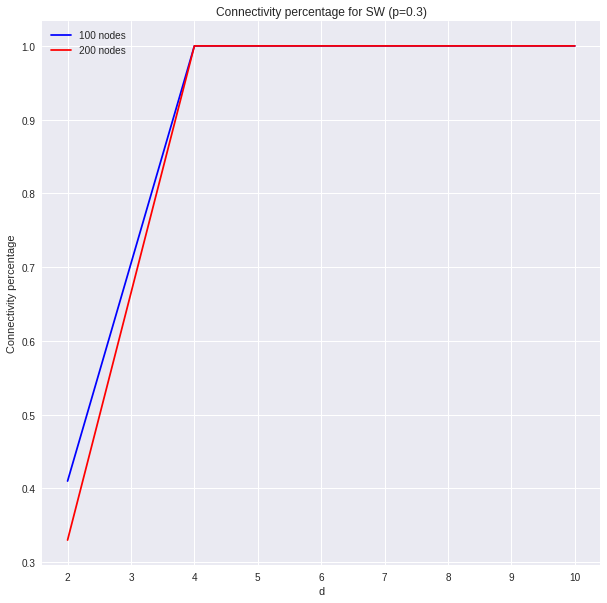

In [0]:
#Connectivity check for SW
y = np.zeros((10,7))

for n in [100,200]:
  for d in range (2,11, 2):
    for g in range (1,8):
      for i in range (0,100):
        SW_temp = nx.watts_strogatz_graph(n,d,g/10)
        if nx.is_connected(SW_temp):
          if n==100:
            y[d//2 -1 , g-1] = y[d//2 -1, g-1] + 1
          else:
            y[d//2 +4 , g-1] = y[d//2 +4, g-1] + 1

#plot example:
for g in range (0,7):
  plt.figure()
  plt.plot(list(range(2,11, 2)),y[:5, g]/100, color='b', label="100 nodes")
  plt.plot(list(range(2,11, 2)),y[5:, g]/100, color='r', label="200 nodes")
  title = "Connectivity percentage for SW (p=" + str((g+1)/10) + ")"
  plt.title(title)
  plt.ylabel("Connectivity percentage")
  plt.xlabel("d")
  plt.legend(loc="best")
  plt.show()

Comment on the results for SW:

There is also a threshold behavior on the SW graph. Μore specifically, when $g_p$ is in [0.1,0.7], the SW graph is constantly connected for $ d>4 $ regardless the number of nodes. This was not expected since the Watts–Strogatz SW graph is constructed by rewiring edges on a Regular Graph (which is always connected). Therefore, we expected for the lower values of the probability of rewiring, which leads to a SW graph close to a Regular Graph, to be constantly connected. 


- In which cases there is a threshold behavior; 

<b>Answer:</b> <br>
From the results above we can see that there is a threshold behavior on the following graphs: RGER, RGG and SW, for the ranges of values for the parameters we were given.


- Find the breaking points that lead to a phase transition for each type of netwrok.

<b>Answer:</b>

1. RGER: <br>
  As we can see for the case of a RGER with 100 nodes, for values of the parameter M higher than 100 we start to see connected graphs until the breaking point M=400 where the graph becomes constantly connected. Then there is a small drop for the connectivity prcentage followed by a completely connected graph period for values of M higher than 600. On the other hand, for the case of a RGER with 200 nodes, connected graphs start to appear for values of M higher than 300 and up until the breaking point on M=800 (upper bound), 100% conectivity percentage hasn't been achieved.

2. RGG: <br>
  In the case of a RGG with 100 nodes, connected graphs start to appear for value of the parameter R higher than 125, whilst 100% conectivity percentage is achieved for R=250. On the other hand, in the case of a RGG with 200 nodes, connected graphs start to appear for R=75, whilst 100% connectivity percentage is achieved for values of R higher than 200.

3. SW: <br>
  First of all, its important to notice that the $g_p$ parameter seems to not have an effect on the conectivity percentage of the SW graph (not expected result). On the other hand, we can see that regardless of the number of nodes, for values of the parameter d higher than the breaking point d=4, the SW graph is constantly connected.

- Which phase transitions are sharp and which are smooth?

<b>Answer:</b> <br>
Based on our results, in the case of the RGER, the phase transitions are smooth. On the contrary, for the RGG and SW graphs, the phase transitions are sharp (the plot has a large slope on the breaking points).

### H) Case study: Random Graphs

Fill the blank cells (1,2,3,4,5) on the following table (in detail) in order for the two models (Gilbert, Erdos-Renyi) to be corresponding. 

<table width="80%">
    <tbody>
        <tr>
            <th>Topology</th>
            <td>$n = 100$</td>
            <td><font color="blue">2</font></td>
            <td>$n = 10^4$</td>
            <td>$n = 10^5$</td>
            <td><font color="blue">5</font></td></td>
        </tr>
        <tr>
            <th>RG(G)</th>
            <td>$p = 0.1$</td>
            <td>$p = 10^{-2}$</td>
            <td>$p = 10^{-3}$</td>
            <td><font color="blue">4</font></td>
            <td>$p = 10^{-5}$</td>
        </tr>
        <tr>
            <th>RG(ER)</th>
            <td><font color="blue">1</font></td>
            <td>$M=4995$</td>
            <td><font color="blue">3</font></td>
            <td>$M=49995$</td>
            <td>$M=499995$</td>
        </tr>
    </tbody>
</table>

In [0]:
print ("1: M = n(n-1)p/2 = 495")
print ("2: n ~= sqrt(2*M/p) ~= 1000") 
print ("3: M = n(n-1)p/2 = 49995")
print ("4: p = 2*M/[n(n-1)] = 10^-4 ")
print ("5: n ~= sqrt(2*M/p) ~= 10^6 ")

1: M = n(n-1)p/2 = 495
2: n ~= sqrt(2*M/p) ~= 1000
3: M = n(n-1)p/2 = 49995
4: p = 2*M/[n(n-1)] = 10^-4 
5: n ~= sqrt(2*M/p) ~= 10^6 


<table width="80%">
    <tbody>
        <tr>
            <th>Topology</th>
            <td>$n = 100$</td>
            <td>$n = 1000$</td>
            <td>$n = 10^4$</td>
            <td>$n = 10^5$</td>
            <td>$n = 10^6$</td></td>
        </tr>
        <tr>
            <th>RG(G)</th>
            <td>$p = 0.1$</td>
            <td>$p = 10^{-2}$</td>
            <td>$p = 10^{-3}$</td>
            <td>$p = 10^{-4}$</td>
            <td>$p = 10^{-5}$</td>
        </tr>
        <tr>
            <th>RG(ER)</th>
            <td>$M=495$</td>
            <td>$M=4995$</td>
            <td>$M=49995$</td>
            <td>$M=49995$</td>
            <td>$M=499995$</td>
        </tr>
    </tbody>
</table>

<b>Comment on the results on H</b>:

We know that on the Gilbert model for the Random Graphs, if the product p*n is constant and the product $p*n^2$ goes to infinity, then it corresponds to the Erdos-Renyi model with a value of M equal to $M = {n(n-1)p \over 2}$. Therefore, using this formula, we can calculate the values for the above blank cells (with some approximations).


### Ι) Case study: The evolution of the Watts-Strogatz model from REG to SW and RGER.

Changing the value of the parameter $g_p$ while constructing the SW topologies, from $0$ to $1$ with a step of $0.1$, find the average path length and the average global clustering coefficient. How does the constructed network behave when $g_p = 0$ , $g_p = 1$ and when $g_p \simeq 0.1 - 0.5$?


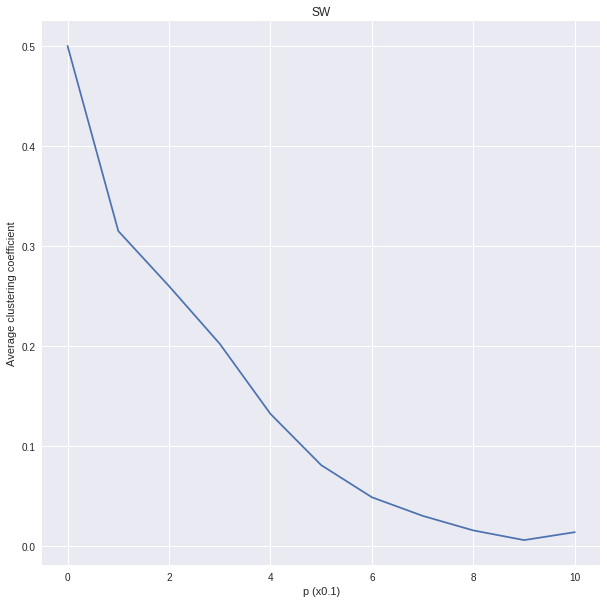

In [0]:
mean_paths = np.zeros(11)
avg_clust_coef = np.zeros(11)
n = 190
d = 4

for p in range (0,11,1):
  SW_temp = nx.watts_strogatz_graph(n,d,p/10)
  mean_paths[p] = np.mean(compute_path_lengths(SW_temp))
  avg_clust_coef[p] = nx.average_clustering(SW_temp)


#plot example:
plt.figure()
plt.plot(list(range(0,11)), mean_paths)
plt.title("SW")
plt.ylabel("Mean value of path lengths")
plt.xlabel("p (x0.1)")
plt.show()

plt.figure()
plt.plot(list(range(0,11)), avg_clust_coef)
plt.title("SW")
plt.ylabel("Average clustering coefficient")
plt.xlabel("p (x0.1)")
plt.show()

Comment on the evolution of the Watts-Strogatz model: <br>
We can see that as the probability of edge rewiring increases, we move progressively from Regular Graph to Random Graph. Specifically, when p=0, the network behaves as a Regular Graph whilst when p=1 it behaves as a Random Graph. For intermediate values of p (0.1 to 0.5) the network behaves as a Small World Network. Which means that for these values we should notice a small average path length and a relatively high average value of clustering coefficient, which are features of the Small World Networks. These expectations are satisfied by the results above and our plots, in which we can see the evolution of these two metrics in regard to the increasement of the probability of rewiring.

### J) Ego-centralities
For each of the complex topologies of the table1, calculate the ego-betweenness centrality of each node. Then rank the nodes based on their ego-betweenness centrality and their betweenness centrality and compare their rankings in regard to their similarity for each topology.

The ego-betweenness centrality is calculated based on the following research paper:

[Ego network betweenness](https://www.sciencedirect.com/science/article/abs/pii/S037887330400067X) <br>by Martin Everett and Stephen P.Borgatti


In [0]:
def calculate_ego_betweenness_centrality(G):
  ego_centr = dict()

  for i in range (0,n):
    ego_net = nx.ego_graph(G,i)
    A = nx.adjacency_matrix(ego_net).todense()
    ones = np.ones(A.shape)
    A_sq = np.linalg.matrix_power(A,2)
    A_ego = np.multiply(A_sq, ones - A)
    A_ego = np.triu(A_ego,1)
    A_ego = A_ego[np.nonzero(A_ego)]
    A_ego = 1/A_ego
    ego_centr[i] = np.sum(A_ego)

  return ego_centr


In [0]:
REG_centrality_measures = {
    'betweenness': calculate_betweenness_centrality(REG),
    'ego-betweenness':calculate_ego_betweenness_centrality(REG)
}

RGER_centrality_measures = {
    'betweenness': calculate_betweenness_centrality(RGER),
    'ego-betweenness':calculate_ego_betweenness_centrality(RGER)
}

RGG_centrality_measures = {
    'betweenness': calculate_betweenness_centrality(RGG),
    'ego-betweenness':calculate_ego_betweenness_centrality(RGG)
}

SF_centrality_measures = {
    'betweenness': calculate_betweenness_centrality(SF),
    'ego-betweenness':calculate_ego_betweenness_centrality(SF)
}

SW_centrality_measures = {
    'betweenness': calculate_betweenness_centrality(SW),
    'ego-betweenness':calculate_ego_betweenness_centrality(SW)
}

In [0]:
REG_centralities = pd.DataFrame(REG_centrality_measures)
RGER_centralities = pd.DataFrame(RGER_centrality_measures)
RGG_centralities = pd.DataFrame(RGG_centrality_measures)
SF_centralities = pd.DataFrame(SF_centrality_measures)
SW_centralities = pd.DataFrame(SW_centrality_measures)

##### REG

In [0]:
REG_indexes = pd.DataFrame()
REG_indexes['betweenness'] = np.argsort(REG_centralities.iloc[:,0])    
REG_indexes['ego-betweenness'] = np.argsort(REG_centralities.iloc[:,1])
REG_indexes['absolute difference'] = abs(REG_indexes['betweenness'] - REG_indexes['ego-betweenness'])

In [0]:
REG_indexes

betweenness  ego-betweenness  absolute difference
0             94               12                   82
1            175               13                  162
2             63               11                   52
3             33              186                  153
4             35              189                  154
..           ...              ...                  ...
185          132              162                   30
186          138              160                   22
187          139               27                  112
188           26                6                   20
189          189                4                  185

[190 rows x 3 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


The mean absolute difference between indexes is: 58.515789


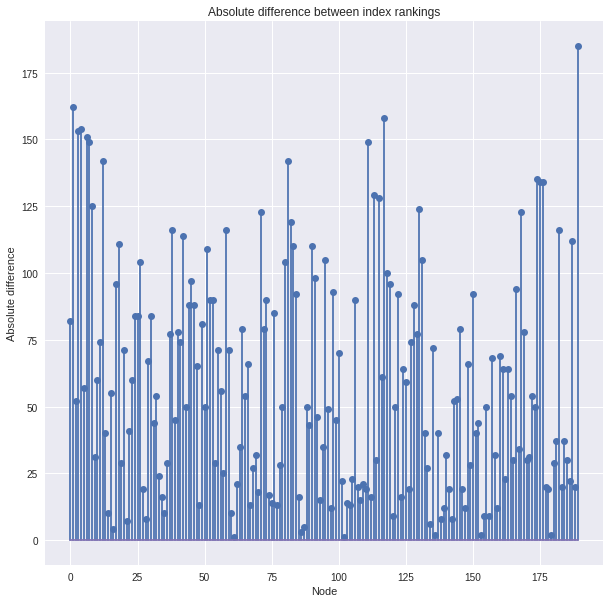

In [0]:
plt.title("Absolute difference between index rankings")
plt.xlabel("Node")
plt.ylabel("Absolute difference")
plt.stem(REG_indexes['absolute difference'])
print("The mean absolute difference between indexes is: %f" %np.mean(REG_indexes['absolute difference']))

In [0]:
sns.pairplot(REG_centralities)

##### RGER

In [0]:
RGER_indexes = pd.DataFrame()
RGER_indexes['betweenness'] = np.argsort(RGER_centralities.iloc[:,0])    
RGER_indexes['ego-betweenness'] =np.argsort(RGER_centralities.iloc[:,1]) 
RGER_indexes['absolute difference'] = abs(RGER_indexes['betweenness'] - RGER_indexes['ego-betweenness'])                  

In [0]:
RGER_indexes

betweenness  ego-betweenness  absolute difference
0            154              106                   48
1            131              154                   23
2             22               62                   40
3             28               22                    6
4             62              131                   69
..           ...              ...                  ...
185           55               55                    0
186           10              129                  119
187            6              119                  113
188           46               21                   25
189           21               14                    7

[190 rows x 3 columns]

In [0]:
plt.title("Absolute difference between index rankings")
plt.xlabel("Node")
plt.ylabel("Absolute difference")
plt.stem(RGER_indexes['absolute difference'])
print("The mean absolute difference between indexes is: %f" %np.mean(RGER_indexes['absolute difference']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


The mean absolute difference between indexes is: 66.273684


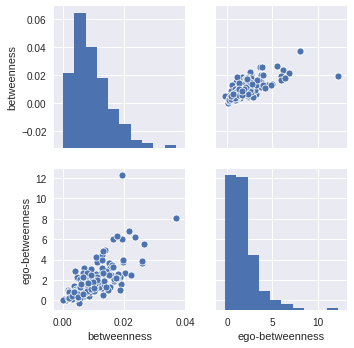

In [0]:
sns.pairplot(RGER_centralities)

##### RGG

In [0]:
RGG_indexes = pd.DataFrame()
RGG_indexes['betweenness'] = np.argsort(RGG_centralities.iloc[:,0])    
RGG_indexes['ego-betweenness'] =np.argsort(RGG_centralities.iloc[:,1])     
RGG_indexes['absolute difference'] = abs(RGG_indexes['betweenness'] - RGG_indexes['ego-betweenness'])              

In [0]:
RGG_indexes

betweenness  ego-betweenness  absolute difference
0             10              150                  140
1            157               61                   96
2            127              159                   32
3            186               23                  163
4             45              173                  128
..           ...              ...                  ...
185           83               83                    0
186           68              107                   39
187            6                6                    0
188          168              118                   50
189           61                3                   58

[190 rows x 3 columns]

In [0]:
plt.title("Absolute difference between index rankings")
plt.xlabel("Node")
plt.ylabel("Absolute difference")
plt.stem(RGG_indexes['absolute difference'])
print("The mean absolute difference between indexes is: %f" %np.mean(RGG_indexes['absolute difference']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


The mean absolute difference between indexes is: 59.084211


In [0]:
sns.pairplot(RGG_centralities)

##### SF

In [0]:
SF_indexes = pd.DataFrame()
SF_indexes['betweenness'] = np.argsort(SF_centralities.iloc[:,0])    
SF_indexes['ego-betweenness'] =np.argsort(SF_centralities.iloc[:,1])
SF_indexes['absolute difference'] = abs(SF_indexes['betweenness'] - SF_indexes['ego-betweenness'])                   

In [0]:
SF_indexes

betweenness  ego-betweenness  absolute difference
0             61               11                   50
1            122              189                   67
2             51              159                  108
3            148              148                    0
4            123               51                   72
..           ...              ...                  ...
185           12               12                    0
186            7               13                    6
187           13                7                    6
188           10               10                    0
189            4                4                    0

[190 rows x 3 columns]

In [0]:
plt.title("Absolute difference between index rankings")
plt.xlabel("Node")
plt.ylabel("Absolute difference")
plt.stem(SF_indexes['absolute difference'])
print("The mean absolute difference between indexes is: %f" %np.mean(SF_indexes['absolute difference']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


The mean absolute difference between indexes is: 42.852632


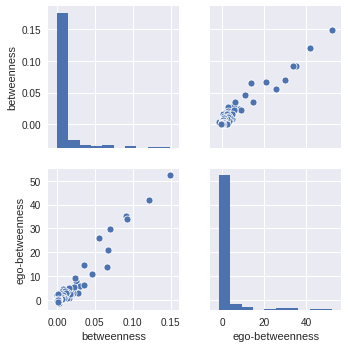

In [0]:
sns.pairplot(SF_centralities)

##### SW

In [0]:
SW_indexes = pd.DataFrame()
SW_indexes['betweenness'] = np.argsort(SW_centralities.iloc[:,0])    
SW_indexes['ego-betweenness'] =np.argsort(SW_centralities.iloc[:,1]) 
SW_indexes['absolute difference'] = abs(SW_indexes['betweenness'] - SW_indexes['ego-betweenness'])                  

In [0]:
SW_indexes

betweenness  ego-betweenness  absolute difference
0             44              167                  123
1             93              168                   75
2             18              166                  148
3             87               64                   23
4            148              130                   18
..           ...              ...                  ...
185           57              157                  100
186          158              181                   23
187           65              131                   66
188           90               57                   33
189          111              111                    0

[190 rows x 3 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


The mean absolute difference between indexes is: 62.821053


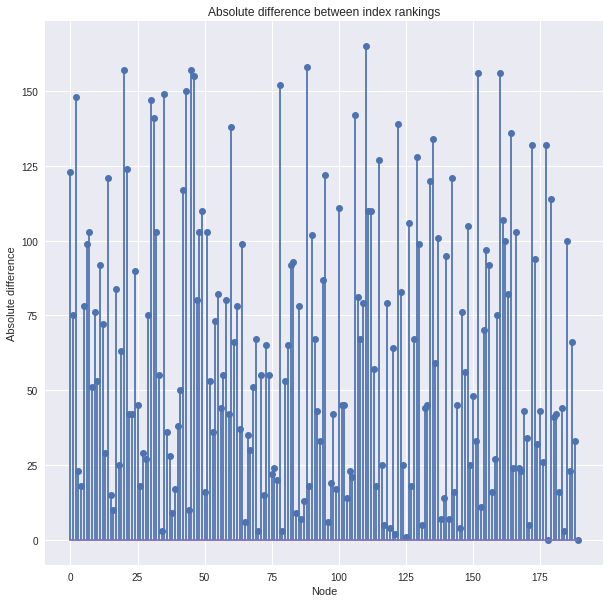

In [0]:
plt.title("Absolute difference between index rankings")
plt.xlabel("Node")
plt.ylabel("Absolute difference")
plt.stem(SW_indexes['absolute difference'])
print("The mean absolute difference between indexes is: %f" %np.mean(SW_indexes['absolute difference']))

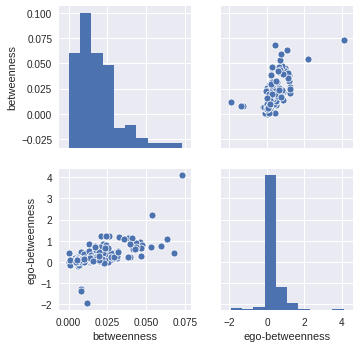

In [0]:
sns.pairplot(SW_centralities)

In [0]:
from numpy import corrcoef
print("The ego-betweenness/betweenness centrality correlation coefficient for REG is: %f" %REG_centralities['betweenness'].corr(REG_centralities['ego-betweenness']))
print("The ego-betweenness/betweenness centrality correlation coefficient for RGER is: %f" %RGER_centralities['betweenness'].corr(RGER_centralities['ego-betweenness']))
print("The ego-betweenness/betweenness centrality correlation coefficient for RGG is: %f" %RGG_centralities['betweenness'].corr(RGG_centralities['ego-betweenness']))
print("The ego-betweenness/betweenness centrality correlation coefficient for SF is: %f" %SF_centralities['betweenness'].corr(SF_centralities['ego-betweenness']))
print("The ego-betweenness/betweenness centrality correlation coefficient for SW is: %f" %SW_centralities['betweenness'].corr(SW_centralities['ego-betweenness']))

The ego-betweenness/betweenness centrality correlation coefficient for REG is: -0.140875
The ego-betweenness/betweenness centrality correlation coefficient for RGER is: 0.731748
The ego-betweenness/betweenness centrality correlation coefficient for RGG is: 0.311825
The ego-betweenness/betweenness centrality correlation coefficient for SF is: 0.972423
The ego-betweenness/betweenness centrality correlation coefficient for SW is: 0.621013


<p>REG:</p>
The results for the REG topology are as expected since all of the nodes have the same betweenness centrality value. Therefore the ranking is random. 
<p>RGER:</p>
On the RGER topology we notice that the average value of the absolute difference between the two indexes is higher than the one on the REG. However the correlation coefficient is relatively high, which means that the high absolute difference is caused by pairs of nodes with extremely different rankings. Looking at the plot with the absolute differences, we can verify the above observation. Therefore its safe to say that the calculation of the ego-betweenness centrality is a good aproximation for the betweenness centrality of the RGER graphs.
<p>RGG:</p>
On the RGG we can see both from the average value and the plot that there many nodes which are ranked on the exact same index, and some nodes with a high deviation between their indexes in regard to the two metrics. These observations justify the high average value of absolute differences. In addition, the correlation coefficient is really low and therefore the ego-betweenness centrality cannot be considered as a good aproximation for the betweenness centrality. 
<p>SF:</p>
The best results are presented on the SF graph. We can see from the plot that there are few nodes that have high deviation in regard to their ranking. In addition, many nodes have the exact same indexing. This leads to a low average value of absolute differences of the indexes. Based on these observations and the high value of correlation coefficient we calculated (close to 1), we can safely say that the calculation of the ego-betweenness centrality is an excellent aproximation for the betweenness centrality on SF graphs.
<p>SW:</p>
On the SW graph we notice on the plot that almost all of the nodes have different rankings. Also, the average value of absolute differences of the indexes is very high. Although, as we can see, this average value is caused by some nodes with very high deviation in regard to their index, since the majority of the nodes have small deviations. In addition, the correlation coefficient we calculated is high enough for the ego-betweenness centrality to be considered as a good aproximation for the betweenness centrality on the SW graphs in some applications.